### pyKRX

In [23]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2024-02-18')

data = pdr.DataReader("006740", "naver", start_date, end_date).astype(int)

In [26]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1247,1281,1225,1250,295581
2018-01-03,1253,1299,1253,1269,270356
2018-01-04,1269,1296,1264,1278,326164
2018-01-05,1281,1294,1249,1260,178990
2018-01-08,1247,1256,1223,1252,319288
...,...,...,...,...,...
2024-02-08,2240,2300,2240,2270,930740
2024-02-13,2275,2345,2265,2320,741250
2024-02-14,2310,2320,2290,2305,402500


<Axes: xlabel='Date'>

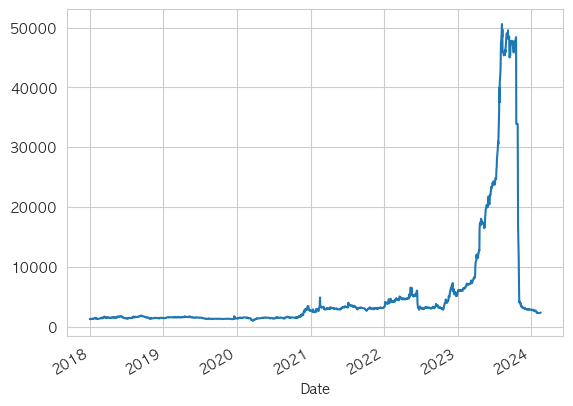

In [25]:
data.Close.plot()

In [35]:
import pykrx as pk

pk.stock.get_market_trading_volume_by_investor(
    fromdate = '2024-02-01', 
    todate = '2024-02-01',
    ticker = '006740'
)

,매도,매수,순매수
투자자구분,,,
금융투자,351,21,-330
보험,0,0,0
투신,0,0,0
사모,0,0,0
은행,0,0,0
기타금융,0,0,0
연기금 등,0,0,0
기관합계,351,21,-330
기타법인,0,20000,20000


In [36]:
import warnings
warnings.filterwarnings('ignore')

for i in data.index :
    data.loc[i, 'Buy_volume'] = pk.stock.get_market_trading_volume_by_investor(
        fromdate = i, 
        todate = i,
        ticker = '006740'
    )['매수'][:-1].sum()
    data.loc[i, 'Sell_volume'] = pk.stock.get_market_trading_volume_by_investor(
        fromdate = i, 
        todate = i,
        ticker = '006740'
    )['매도'][:-1].sum()

In [29]:
data

,Open,High,Low,Close,Volume,Buy_volume,Sell_volume
Date,,,,,,,
2018-01-02,1247,1281,1225,1250,295581,254300.0,254302.0
2018-01-03,1253,1299,1253,1269,270356,232598.0,232598.0
2018-01-04,1269,1296,1264,1278,326164,280612.0,280612.0
2018-01-05,1281,1294,1249,1260,178990,154096.0,153992.0
2018-01-08,1247,1256,1223,1252,319288,274696.0,274696.0
...,...,...,...,...,...,...,...
2024-02-08,2240,2300,2240,2270,930740,1861488.0,1861560.0
2024-02-13,2275,2345,2265,2320,741250,1482559.0,1485838.0
2024-02-14,2310,2320,2290,2305,402500,805003.0,815189.0
